# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Lisna Rahma Fitriati
- **Email:** mc299d5x0490@student.devacademy.id
- **ID Dicoding:** mc299d5x0490

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1  : Bagaimana rata-rata faktor cuaca di setiap bulan pada tahun 2012, dan apakah ada pola yang dapat memengaruhi jumlah penyewaan sepeda?
- Pertanyaan 2 : Bagaimana pola penyewaan sepeda berdasarkan musim dan kondisi cuaca?

## Import Semua Packages/Library yang Digunakan

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [28]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

print("Preview dataset day.csv:")
display(day_df.head())

print("\nPreview dataset hour.csv:")
display(hour_df.head())

Preview dataset day.csv:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Preview dataset hour.csv:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari dataset ini, kita dapat menemukan hari dengan jumlah penyewaan sepeda tertinggi dan faktor-faktor yang memengaruhinya, seperti cuaca, suhu, kelembaban, dan kondisi lainnya.
- Dengan membandingkan pola penyewaan sepeda antara hari kerja dan akhir pekan, kita dapat melihat apakah terdapat perbedaan pola penggunaan sepeda secara signifikan.

### Assessing Data

In [29]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [30]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Mengecek Missing Value

In [31]:
print("\n Jumlah Missing Values pada Day.csv:")
print(day_df.isnull().sum())
print("\n Jumlah Missing Values pada Hour.csv:")
print(hour_df.isnull().sum())


 Jumlah Missing Values pada Day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 Jumlah Missing Values pada Hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Mengecek data duplikat

In [32]:
print("\n Jumlah Data Duplikat pada Day.csv:", day_df.duplicated().sum())
print("\n Jumlah Data Duplikat pada Hour.csv:", hour_df.duplicated().sum())


 Jumlah Data Duplikat pada Day.csv: 0

 Jumlah Data Duplikat pada Hour.csv: 0


Mengecek Outlier

In [33]:
num_cols_day = ["temp", "hum", "windspeed", "cnt"]
num_cols_hour = ["temp", "hum", "windspeed", "cnt"]

def detect_outliers_iqr(df, num_cols):
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum()
    return outliers

print("Jumlah outlier pada dataset day.csv:")
print(detect_outliers_iqr(day_df, num_cols_day))

print("\nJumlah outlier pada dataset hour.csv:")
print(detect_outliers_iqr(hour_df, num_cols_hour))

Jumlah outlier pada dataset day.csv:
temp          0
hum           2
windspeed    13
cnt           0
dtype: int64

Jumlah outlier pada dataset hour.csv:
temp           0
hum           22
windspeed    342
cnt          505
dtype: int64


**Insight:**
- Tidak ditemukan missing values pada dataset, sehingga data yang dimiliki merupakan data bersih dan tidak perlu melakukan imputasi nilai yang hilang
- Tidak ada duplikasi data dan setiap baris yang dimiliki adalah baris yang unik, sehingga tidak perlu membersihkan duplikasi karena dataset sudah rapi.
- Kolom dateday seharusnya memiliki tipe data date time, bukan object
- Dari hasil IQR, ditemukan outlier pada beberapa variabel, terutama pada `windspeed` dan `cnt` di kedua dataset (`day.csv` dan `hour.csv`).
- Outlier pada `windspeed` menunjukkan adanya beberapa nilai angin yang tidak biasa, yang bisa berpengaruh pada pola penyewaan sepeda.
- Banyaknya outlier pada `cnt` dalam dataset per jam menunjukkan kemungkinan lonjakan penggunaan sepeda pada waktu tertentu, seperti jam sibuk atau kondisi cuaca yang mendukung.
- Untuk menjawab pertanyaan 1 dan 2 hanya dibutuhkan dataset day.csv, maka saya tidak akan menggunakan dataset hour.csv

### Cleaning Data

In [34]:
# Membuat salinan data agar data asli tidak berubah
day_cleaned = day_df.copy()

Mengubah kolom dteday menjadi tipe data date time

In [35]:
day_cleaned['dteday'] = pd.to_datetime(day_cleaned['dteday'])

Mengganti outlier dengan median

In [36]:
for col in ['windspeed', 'hum', 'cnt']:
    Q1 = day_cleaned[col].quantile(0.25)
    Q3 = day_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = day_cleaned[col].median()
    day_cleaned[col] = day_cleaned[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)


**Insight:**
- Tipe data dteday sudah diubah menjadi date time
- Outlier telah ditangani menggunakan metode imputation, sehingga nilai ekstrem tidak terlalu memengaruhi analisis.
- Distribusi data lebih bersih, khususnya pada variabel windspeed, humidity, dan cnt (total penyewaan sepeda), yang sebelumnya memiliki outlier.

## Exploratory Data Analysis (EDA)

### Explore day_cleaned


In [37]:
day_cleaned.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
day_cleaned.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629352,0.186295,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.522291,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.229785,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.139566,0.071153,686.622488,1560.256377,1937.211452


In [39]:
day_2012 = day_cleaned[day_cleaned["yr"] == 1]  # yr = 1 berarti tahun 2012

rata_rata_per_bulan_2012 = day_2012.groupby("mnth")["cnt"].mean()

rata_rata_per_bulan_2012

,cnt
mnth,
1,3120.774194
2,3556.448276
3,5318.548387
4,5807.466667
5,6318.225806
6,6761.000000
7,6567.967742
8,6919.451613
9,7285.766667


In [40]:
day_2012 = day_cleaned[day_cleaned["yr"] == 1]

rata_rata_faktor_per_bulan = (
    day_2012.groupby("mnth")[["temp", "hum", "windspeed"]].mean()
)

rata_rata_faktor_per_bulan

,temp,hum,windspeed
mnth,,,
1,0.275181,0.587290,0.209624
2,0.315337,0.574582,0.187075
3,0.449411,0.607536,0.190402
4,0.468809,0.507839,0.224748
5,0.612366,0.664556,0.184704
6,0.675111,0.558361,0.192644
7,0.752366,0.606089,0.160450
8,0.711801,0.648629,0.155116
9,0.620083,0.645375,0.178901


In [41]:
correlation_windspeed = day_cleaned[['cnt', 'windspeed']].corr().iloc[0, 1]
correlation_table = pd.DataFrame(
    {"Korelasi dengan Windspeed": [correlation_windspeed]},
    index=["Jumlah Penyewaan Sepeda"]
)
correlation_table

,Korelasi dengan Windspeed
Jumlah Penyewaan Sepeda,-0.215571


In [42]:
rent_by_season = day_cleaned.groupby("season")["cnt"].mean().reset_index()

print("Rata-rata Penyewaan Sepeda Berdasarkan Musim:")
print(rent_by_season)

Rata-rata Penyewaan Sepeda Berdasarkan Musim:
   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


In [43]:
rent_by_weather = day_cleaned.groupby("weathersit")["cnt"].mean().reset_index()
print("\nRata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca:")
print(rent_by_weather)


Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca:
   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714


**Insight:**
- Suhu rata-rata cenderung lebih rendah di awal tahun (Januari-Februari) dan mulai meningkat dari Maret hingga mencapai puncaknya pada bulan Juli.
- Bulan dengan suhu tinggi (Juni-Agustus) mungkin lebih menarik bagi pengguna untuk menyewa sepeda, namun faktor kelembaban dan angin juga bisa memengaruhi keputusan pengguna.
- Nilai negatif pada korelasi dengan windspeed menunjukkan bahwa ketika kecepatan angin meningkat, jumlah penyewaan sepeda cenderung menurun.
- Musim dingin (season = 1) memiliki jumlah penyewaan terendah (2604 sepeda/hari)
- Cuaca cerah/sebagian berawan (weathersit = 1) memiliki rata-rata jumlah penyewaan tertinggi (4876 sepeda/hari).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana rata-rata faktor cuaca di setiap bulan pada tahun 2012, dan apakah ada pola yang dapat memengaruhi jumlah penyewaan sepeda?


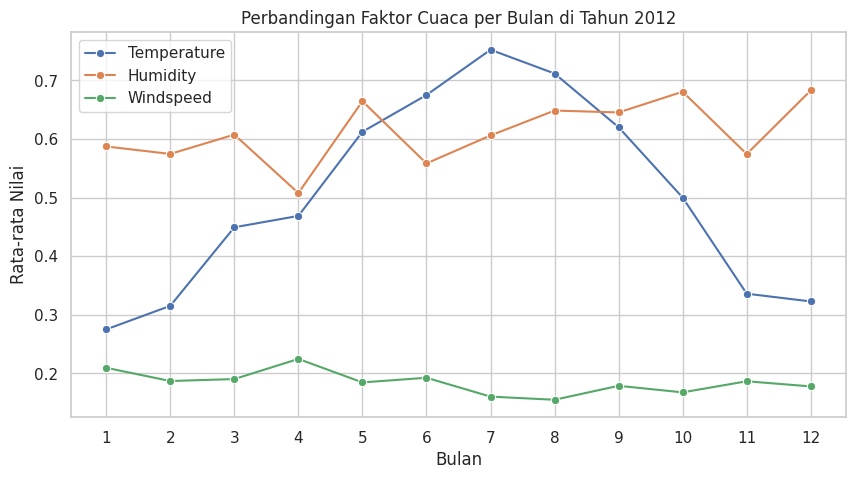

In [44]:
plt.figure(figsize=(10, 5))

# Lineplot untuk masing-masing faktor
sns.lineplot(x=rata_rata_faktor_per_bulan.index, y=rata_rata_faktor_per_bulan['temp'], label='Temperature', marker='o')
sns.lineplot(x=rata_rata_faktor_per_bulan.index, y=rata_rata_faktor_per_bulan['hum'], label='Humidity', marker='o')
sns.lineplot(x=rata_rata_faktor_per_bulan.index, y=rata_rata_faktor_per_bulan['windspeed'], label='Windspeed', marker='o')

# Label dan judul
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Nilai")
plt.title("Perbandingan Faktor Cuaca per Bulan di Tahun 2012")
plt.legend()
plt.xticks(range(1, 13))  # Menampilkan angka bulan dari 1-12

plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan musim dan kondisi cuaca?

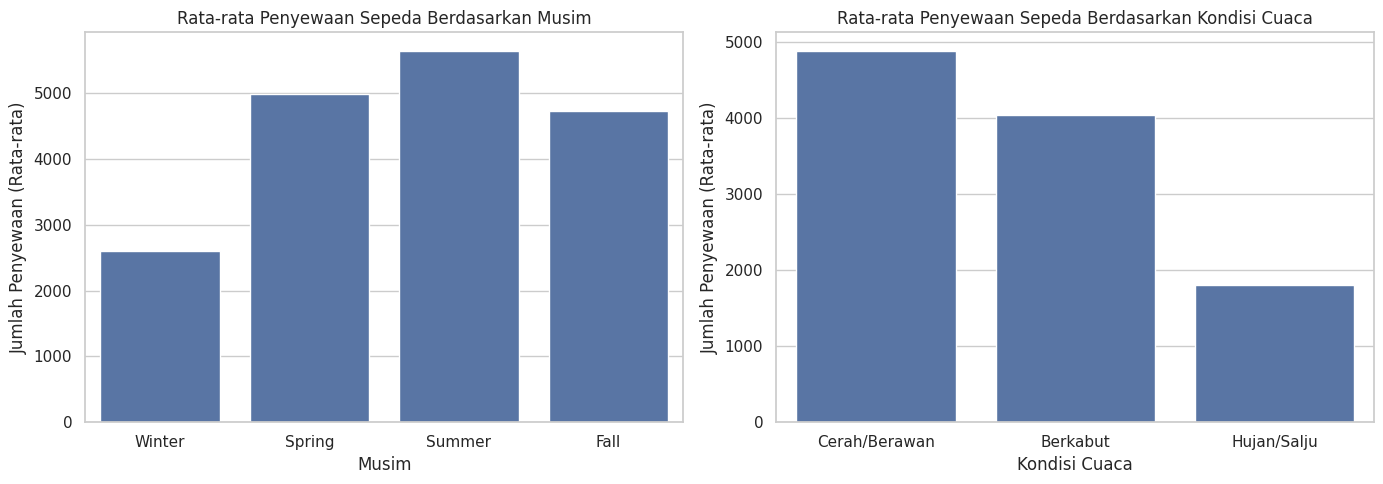

In [45]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=["Winter", "Spring", "Summer", "Fall"], y=rent_by_season["cnt"], ax=axes[0])
axes[0].set_title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
axes[0].set_ylabel("Jumlah Penyewaan (Rata-rata)")
axes[0].set_xlabel("Musim")

sns.barplot(x=["Cerah/Berawan", "Berkabut", "Hujan/Salju"], y=rent_by_weather["cnt"], ax=axes[1])
axes[1].set_title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
axes[1].set_ylabel("Jumlah Penyewaan (Rata-rata)")
axes[1].set_xlabel("Kondisi Cuaca")

plt.tight_layout()
plt.show()

**Insight:**
- Suhu (temp) cenderung meningkat dari Januari hingga puncaknya di Juli, lalu menurun hingga Desember. Ini mencerminkan pola musim dengan musim panas di pertengahan tahun.
- Kelembaban (hum) menunjukkan pola yang cukup fluktuatif, dengan puncak di Mei dan Desember.
- Kecepatan angin (windspeed) tampak menurun secara bertahap setelah Januari dan mencapai titik terendah di bulan Agustus, lalu sedikit meningkat kembali.
- Penyewaan sepeda tertinggi terjadi pada musim panas (Summer) dengan rata-rata sekitar 5.600 penyewaan per hari.
- Saat berkabut, jumlah penyewaan sedikit berkurang menjadi sekitar 4.000 penyewaan per hari.

## Conclusion

- Conclution pertanyaan 1 : Bagaimana rata-rata faktor cuaca di setiap bulan pada tahun 2012, dan apakah ada pola yang dapat memengaruhi jumlah penyewaan sepeda?

Berdasarkan analisis terhadap faktor cuaca dan pola penyewaan sepeda, ditemukan bahwa faktor cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Rata-rata faktor cuaca setiap bulan pada tahun 2012 menunjukkan adanya pola musiman, di mana suhu yang lebih tinggi dan kelembaban yang lebih rendah cenderung meningkatkan jumlah penyewaan sepeda. Selain itu, kondisi cuaca yang lebih cerah atau sedang (tidak hujan atau bersalju) juga berkorelasi dengan peningkatan jumlah penyewa. Hal ini mengindikasikan bahwa pengguna lebih cenderung menyewa sepeda pada saat cuaca mendukung aktivitas luar ruangan.

- Conclution Pertanyaan 2 : Bagaimana pola penyewaan sepeda berdasarkan musim dan kondisi cuaca?

Analisis pola penyewaan sepeda berdasarkan musim dan kondisi cuaca menunjukkan bahwa musim panas dan cuaca cerah adalah faktor utama yang meningkatkan permintaan. Oleh karena itu, strategi bisnis seperti promosi musiman dan insentif saat cuaca buruk dapat diterapkan untuk mengoptimalkan jumlah penyewaan sepanjang tahun.

In [46]:
day_cleaned.to_csv('main_data.csv', index=False)